## pandas
---
Pandas is a fast, powerful , flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.   
→ 파이썬 프로그래밍 기반 오픈 소스 데이터 분석 라이브러리   
→ 레이블링된 데이터를 쉽고 직관적으로 작업할 수 있도록 고안된 데이터 구조를 제공하는 Python 라이브러리   

## pandas의 특징
---
- 데이터처리를 위한 빠르고 효율적인 DataFrame 객체 제공
- CSV, text, Excel, SQL 등의 데이터를 읽고 쓸 수 있는 기능
- 데이터 정렬 및 missing 데이터에 대한 통합적 처리
- 유연한 데이터 reshaping과 pivoting
- 큰 데이터에 대한 slicing, indexing 및 subsetting
- Column 추가 및 삭제에 대한 가변성
- 데이터 병합, 변환 등의 처리 기능
- 구조적 인덱싱
- Time series 데이터에 대한 기능
- C언어 등으로 개발하여 데이터 처리에 최적화

## 데이터 타입
---
- 데이터 table은 DataFrame 형식으로 저장
- DataFrame의 각 column은 Series

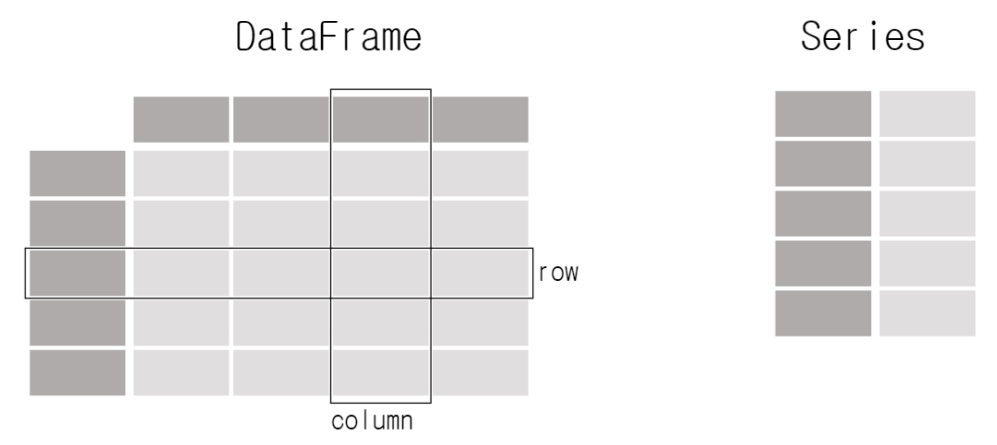

In [1]:
import pandas as pd

# DataFrame
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
            "Junse Lee"
        ],
        "Age": [22, 35, 58, 38],
        "Sex": ["male","male","female", "male"],
        "Nationality": ["UK", "Germany", "Austria", "Korea"]
    }
)

print(df, end="\n\n")
print(df["Age"], end="\n\n")

# Series
ages = pd.Series([22, 35, 58], name="age")
print(ages, end="\n\n")

# What can we do with a DataFrame or a Series?
print(df["Age"].max(), end="\n\n")
print(ages.max(), end="\n\n")
print(df.describe(), end="\n\n")

                       Name  Age     Sex Nationality
0   Braund, Mr. Owen Harris   22    male          UK
1  Allen, Mr. William Henry   35    male     Germany
2  Bonnell, Miss. Elizabeth   58  female     Austria
3                 Junse Lee   38    male       Korea

0    22
1    35
2    58
3    38
Name: Age, dtype: int64

0    22
1    35
2    58
Name: age, dtype: int64

58

58

             Age
count   4.000000
mean   38.250000
std    14.885675
min    22.000000
25%    31.750000
50%    36.500000
75%    43.000000
max    58.000000



## 데이터 입출력
---
- `read_*` : 특정 format의 data를 읽을 때
- `to_*` : 특정 format으로 data를 추출할 때
- `head` : 첫 몇 줄의 row들 출력
- `tail` : 마지막 몇 줄의 row들 출력
- `info` : 데이터의 정보 출력

In [2]:
import pandas as pd

titanic = pd.read_csv("/kaggle/input/220520-adpy-w12-files/titanic.csv")

print(titanic, end="\n\n")
print(titanic.head(8), end="\n\n")
print(titanic.tail(8), end="\n\n")
print(titanic.dtypes, end="\n\n")

# ModuleNotFoundError: No module named 'openpyxl'
# pip install openpyxl
titanic.to_excel("titanic_index_False.xlsx", sheet_name="passengers", index=False)  # csv에 있던 그대로 들어감
titanic.to_excel("titanic_index_True.xlsx", sheet_name="passengers", index=True)  # 첫 열에 추가 인덱스가 생김

titanic.to_csv("titanic_mod.csv")
titanic = pd.read_excel("titanic_index_False.xlsx", sheet_name="passengers")
titanic.info()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## DataFrame의 subset 선택
---
- Data의 subset을 선택할 때 bracket \[\] 사용
- `loc` : 특정 row와 column의 이름을 이용하여 data를 선택
- `iloc` : 특정 row와 colum의 table 위치를 이용하여 data를 선택

In [3]:
import pandas as pd

titanic = pd.read_csv("/kaggle/input/220520-adpy-w12-files/titanic.csv")
print(titanic.head(), end="\n\n")

# 특정 Column 추출
ages = titanic["Age"]
print(ages.head(), end="\n\n")
print(titanic["Age"].shape, end="\n\n")

age_sex = titanic[["Age","Sex"]]  # 대괄호 꼭 2번
print(age_sex.head(), end="\n\n")


# Row filtering
above_35 = titanic[titanic["Age"] > 35]  # 나이가 35 이상
print(above_35.head(), end="\n\n")

class_23 = titanic[titanic["Pclass"].isin([2, 3])]  # 좌석 클래스가 2 또는 3
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]  # 바로 윗줄과 같은 의미
print(class_23.head(), end="\n\n")

age_no_na = titanic[titanic["Age"].notna()]  # 나이 정보가 있는 사람만


# 특정 row와 Column 추출
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]  # 나이가 35 이상인 사람들의 이름
print(adult_names.head(), end="\n\n")

print(titanic.iloc[9:25, 2:5], end="\n\n")  # 인덱스로 직접 추출 start:end 하면 start부터 (end - 1)까지. 두 인자의 순서는 행, 열

titanic.iloc[0:3, 2] = "Unknown class"  # 특정 위치에 값 입력
# 0번부터 (3 - 1)번에 해당하는 사람의 2번 열에 대입한 값을 입력한다.
print(titanic.head(), end="\n\n")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

0

## Pandas 데이터 그리기
#### + 출석 대체 문제
---
- `.plot.*` : Series와 DataFrames의 그림을 그리기 위한 메서드
- Pandas에 의해 만들어지는 plot은 Matplotlib 객체로 만들어짐

                     station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN



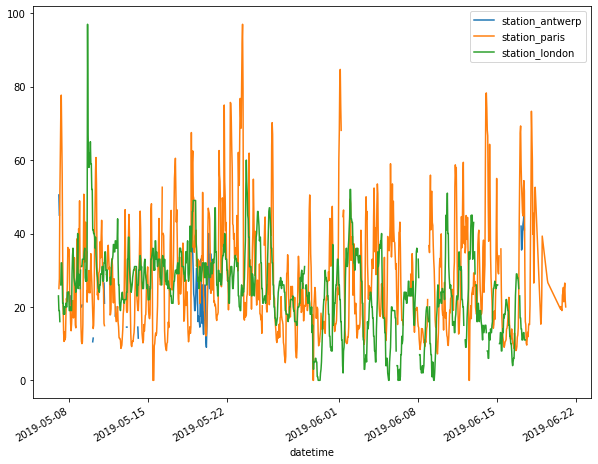

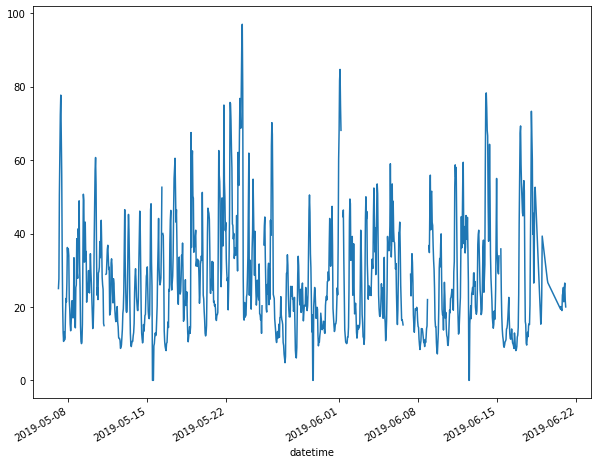

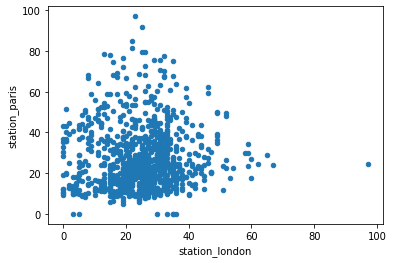

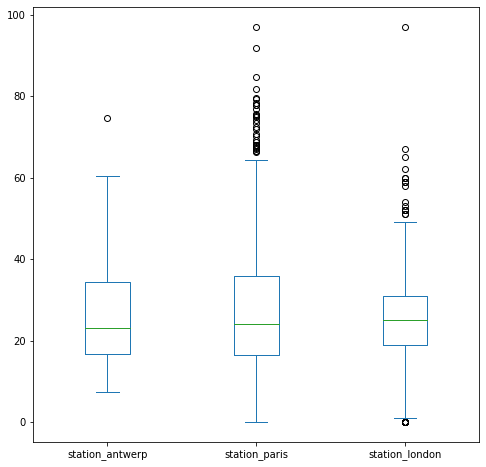

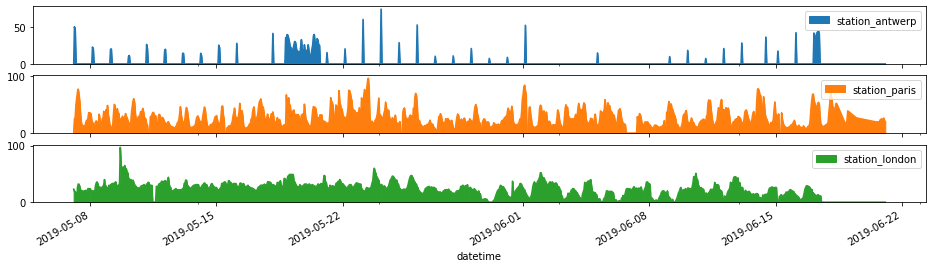

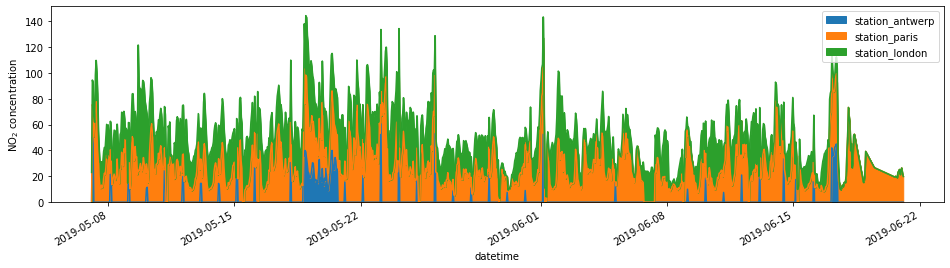

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

air_quality = pd.read_csv("/kaggle/input/220520-adpy-w12-files/air_quality_no2.csv", index_col=0, parse_dates=True)
# parse_dates=True : 시계열 데이터일 경우 날짜 파싱
print(air_quality.head() , end="\n\n")

air_quality.plot(figsize=(10, 8))
plt.show()

air_quality["station_paris"].plot(figsize=(10, 8))
plt.show()

air_quality.plot.scatter(x="station_london", y="station_paris")
plt.show()

air_quality.plot.box(figsize=(8, 8))  # 자세한 의미는 통계 수업 같은 데서 배워라
plt.show()

air_quality.plot.area(figsize=(16, 4), subplots=True)  # .area : 그래프 밑에 색칠해줌
plt.show()

fig, axs = plt.subplots(figsize=(16, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")  # $ 기호 안에 있어야 아래첨자로 표시됨
axs.legend(loc="upper right")
plt.show()
fig.savefig("no2_concentrations.png")

## Column 추가
---
- DataFrame에 column을 추가하기 위해 \[\] 안에 column name을 입력
- Row별 loop없이 element-wise로 동작
- `rename` : row나 column 이름을 바꿀 수 있음

In [5]:
import pandas as pd

air_quality = pd.read_csv("/kaggle/input/220520-adpy-w12-files/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882  # Column 추가
air_quality["ratio_paris_anterp"] = (air_quality["station_paris"] / air_quality["station_antwerp"])  # Column 추가
air_quality_renamed = air_quality.rename(
    columns = {  # column 이름을 바꿀 수 있음
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster"
    }
)
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)  # column 이름을 바꿀 수 있음

air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_anterp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


## 데이터 통계
---
- 전체 Column과 Row에 대하여 데이터의 통계를 얻을 수 있음
- `groupby` : 그룹별로 집계하여 데이터의 통계를 얻는 메서드
- `value_counts` : 각 변수의 카테고리별로 성분의 개수를 세는 메서드

In [6]:
titanic = pd.read_csv("/kaggle/input/220520-adpy-w12-files/titanic.csv")
print(titanic["Age"].mean(), end="\n\n")  # 평균 나이
print(titanic[["Age","Fare"]].median(), end="\n\n")  # 나이와 Fare의 중간값
print(titanic[["Age","Fare"]].describe(), end="\n\n")  # 나이와 Fare 통계

titanic_agg = titanic.agg(  # 특정 통계를 출력할 때
    {
        "Age":["min","max","median","skew"],
        "Fare":["min","max","median","mean"]
    }
)
print(titanic_agg, end="\n\n")  # 특정 통계를 출력할 때

# print(titanic[["Sex","Age"]].groupby("Sex").mean(), end="\n\n")  # 성별에 따른 평균 나이
print(titanic.groupby("Sex")["Age"].mean(), end="\n\n")  # 성별에 따른 평균 나이

# print(titanic.groupby("Sex").mean(), end="\n\n")  # 모든 속성의 성별에 따른 평균
print(titanic.groupby(["Sex","Pclass"])["Fare"].mean(), end="\n\n")  # 성별과 Pclass에 따른 평균 Fare

print(titanic["Pclass"].value_counts(), end="\n\n")  # Pclass 값의 종류별로 개수 세기
print(titanic.groupby("Pclass")["Pclass"].count(), end="\n\n")  # Pclass 값의 종류별로 개수 세기 + 정렬

29.69911764705882

Age     28.0000
Fare    14.4542
dtype: float64

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

              Age        Fare
min      0.420000    0.000000
max     80.000000  512.329200
median  28.000000   14.454200
skew     0.389108         NaN
mean          NaN   32.204208

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64



In [7]:
titanic[["Sex","Age"]].groupby("Sex").mean()  # 성별에 따른 평균 나이

,Age
Sex,
female,27.915709
male,30.726645


In [8]:
titanic.groupby("Sex").mean()  # 모든 속성의 성별에 따른 평균

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


## 데이터 재구조화(pivot)
---
- `sort_values` : 하나 혹은 여러 개의 column 기반 정렬하는 메서드
- `pivot`, `pivot_table` : 데이터를 재구조화하는 메서드

In [9]:
import pandas as pd

titanic = pd.read_csv("/kaggle/input/220520-adpy-w12-files/titanic.csv")
air_quality = pd.read_csv("/kaggle/input/220520-adpy-w12-files/air_quality_long.csv")

# sort table rows
titanic1 = titanic[["PassengerId", "Pclass", "Age"]]
titanic1_sort1 = titanic1.sort_values(by="Age")
# print(titanic1_sort1.head())
titanic1_sort2 = titanic1.sort_values(by=["Pclass","Age"],ascending=False)
# print(titanic1_sort2.head())

# pivoting
no2_tmp = air_quality[air_quality["parameter"] == "no2"]
no2 = no2_tmp[["city", "country", "date.utc", "location", "value"]]
no2_subset = no2.sort_index().groupby(["location"]).head(2)
# print(no2_subset.pivot(columns="location",values="value"))
# print(air_quality.pivot_table(values = "value",index="location",columns="parameter",aggfunc="mean"))

In [10]:
titanic1_sort1.head()  # titanic1.sort_values(by="Age")

,PassengerId,Pclass,Age
803,804,3,0.42
755,756,2,0.67
644,645,3,0.75
469,470,3,0.75
78,79,2,0.83


In [11]:
titanic1_sort2.head()  # titanic1.sort_values(by=["Pclass","Age"],ascending=False)

,PassengerId,Pclass,Age
851,852,3,74.0
116,117,3,70.5
280,281,3,65.0
483,484,3,63.0
326,327,3,61.0


In [12]:
no2_subset.pivot(columns="location",values="value")

location,BETR801,FR04014,London Westminster
1825,NaN,20.0,NaN
1826,NaN,21.8,NaN
3501,41.0,NaN,NaN
3502,45.0,NaN,NaN
3664,NaN,NaN,11.0
3665,NaN,NaN,11.0


In [13]:
air_quality.pivot_table(values = "value",index="location",columns="parameter",aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


### 출석 예제 2
---
`air_quality_no2.csv`에서 읽은 data에 `paris_g_per_cubic`이라는 column을 추가하고 `station_paris`의 값에 1000을 곱한 값을 넣은 data를 `air_quality_no3.csv`로 저장하시오.

In [14]:
# air_quality_no2.csv에서 읽은 data에
air_quality_no2 = pd.read_csv("/kaggle/input/220520-adpy-w12-files/air_quality_no2.csv")
# paris_g_per_cubic이라는 column을 추가하고 station_paris의 값에 1000을 곱한 값을 넣은 data를
air_quality_no2["paris_g_per_cubic"] = air_quality_no2["station_paris"] * 1000
# air_quality_no3.csv로 저장하시오
air_quality_no2.to_csv("/kaggle/working/air_quality_no3.csv")
data = pd.read_csv("/kaggle/working/air_quality_no3.csv")

data.head()

,Unnamed: 0,datetime,station_antwerp,station_paris,station_london,paris_g_per_cubic
0,0,2019-05-07 02:00:00,NaN,NaN,23.0,NaN
1,1,2019-05-07 03:00:00,50.5,25.0,19.0,25000.0
2,2,2019-05-07 04:00:00,45.0,27.7,19.0,27700.0
3,3,2019-05-07 05:00:00,NaN,50.4,16.0,50400.0
4,4,2019-05-07 06:00:00,NaN,61.9,NaN,61900.0


In [15]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/220520-adpy-w12-files/air_quality_no2.csv
/kaggle/input/220520-adpy-w12-files/titanic.csv
/kaggle/input/220520-adpy-w12-files/air_quality_long.csv
